# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [11]:
#https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
!pip install gdown
!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

but Gdown can't. Please check connections and permissions.


## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [3]:
df = pd.read_csv('/content/Bus_Breakdown_and_Delays.csv')
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [13]:
df.dtypes

,0
School_Year,object
Busbreakdown_ID,int64
Run_Type,object
Bus_No,object
Route_Number,object
Reason,object
Schools_Serviced,object
Occurred_On,object
Created_On,object
Boro,object


In [14]:
df.shape

(72157, 21)

In [15]:
df.describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,7.215700e+04,72157.000000
mean,1.253958e+06,3.878321
std,2.301671e+04,63.864995
min,1.212691e+06,0.000000
25%,1.234823e+06,0.000000
50%,1.254494e+06,0.000000
75%,1.273573e+06,4.000000
max,1.361694e+06,9007.000000


In [16]:
df['Breakdown_or_Running_Late'].value_counts()

,count
Breakdown_or_Running_Late,
Running Late,63848
Breakdown,8308


In [17]:
for column in df.select_dtypes(include=['object']).columns:
    print(f"{column}:\n{df[column].value_counts()}\n")

School_Year:
School_Year
2015-2016    57309
2016-2017    14844
2017-2018        4
Name: count, dtype: int64

Run_Type:
Run_Type
Special Ed AM Run          44175
Pre-K/EI                    9208
General Ed AM Run           7946
Special Ed PM Run           7734
General Ed PM Run           2312
Special Ed Field Trip        354
General Ed Field Trip        250
Project Read PM Run          125
Project Read AM Run           14
Project Read Field Trip        1
Name: count, dtype: int64

Bus_No:
Bus_No
357       317
9352      224
213       187
118       181
365       172
         ... 
826         1
661         1
599D        1
NI1150      1
1843        1
Name: count, Length: 8887, dtype: int64

Route_Number:
Route_Number
1        1323
2        1012
3         944
5         723
4         581
         ... 
M513        1
X9618       1
VN2         1
P735        1
K308        1
Name: count, Length: 9398, dtype: int64

Reason:
Reason
Heavy Traffic                  41362
Other                          

In [18]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,38
Bus_No,0
Route_Number,46
Reason,56
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,2898


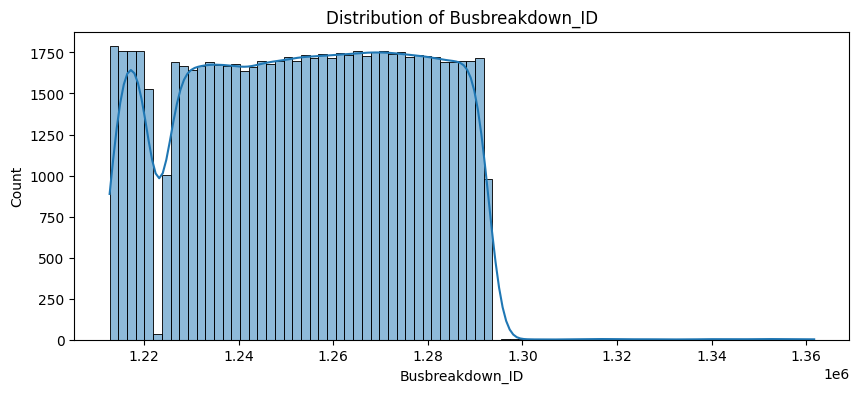

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7c9332c1d3f0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7c9332c1c670> (for post_execute):


KeyboardInterrupt: 

In [19]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

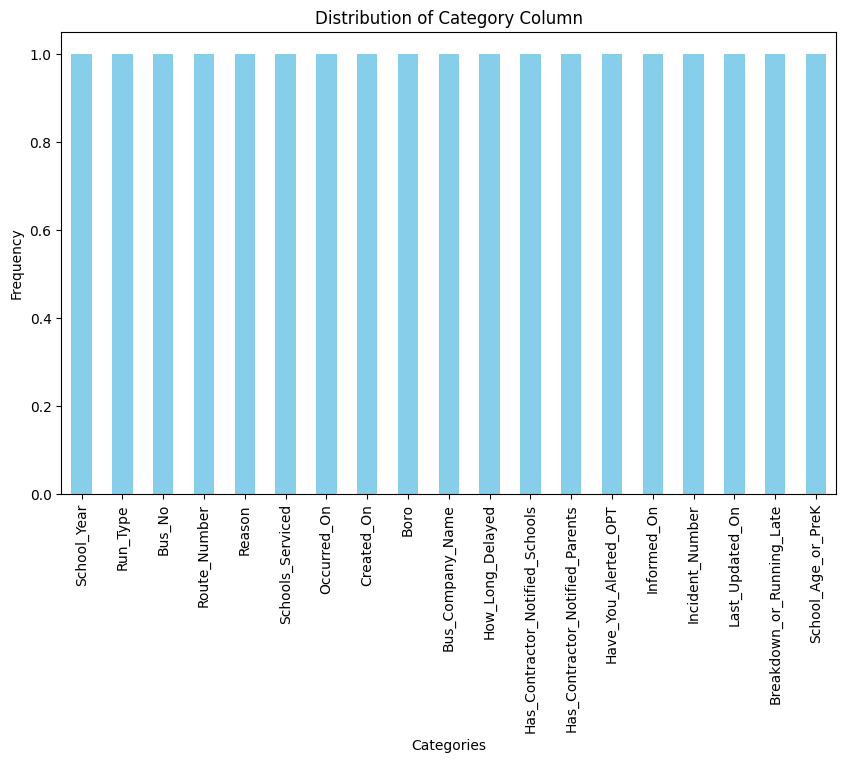

In [20]:
plt.figure(figsize=(10, 6))
df.select_dtypes(include=['object']).columns.value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Category Column')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()



In [21]:
frequency_df = df.select_dtypes(include=['object']).columns.value_counts().reset_index()
frequency_df.columns = ['Category', 'Count']
print(frequency_df)

                           Category  Count
0                       School_Year      1
1                          Run_Type      1
2                            Bus_No      1
3                      Route_Number      1
4                            Reason      1
5                  Schools_Serviced      1
6                       Occurred_On      1
7                        Created_On      1
8                              Boro      1
9                  Bus_Company_Name      1
10                 How_Long_Delayed      1
11  Has_Contractor_Notified_Schools      1
12  Has_Contractor_Notified_Parents      1
13             Have_You_Alerted_OPT      1
14                      Informed_On      1
15                  Incident_Number      1
16                  Last_Updated_On      1
17        Breakdown_or_Running_Late      1
18               School_Age_or_PreK      1


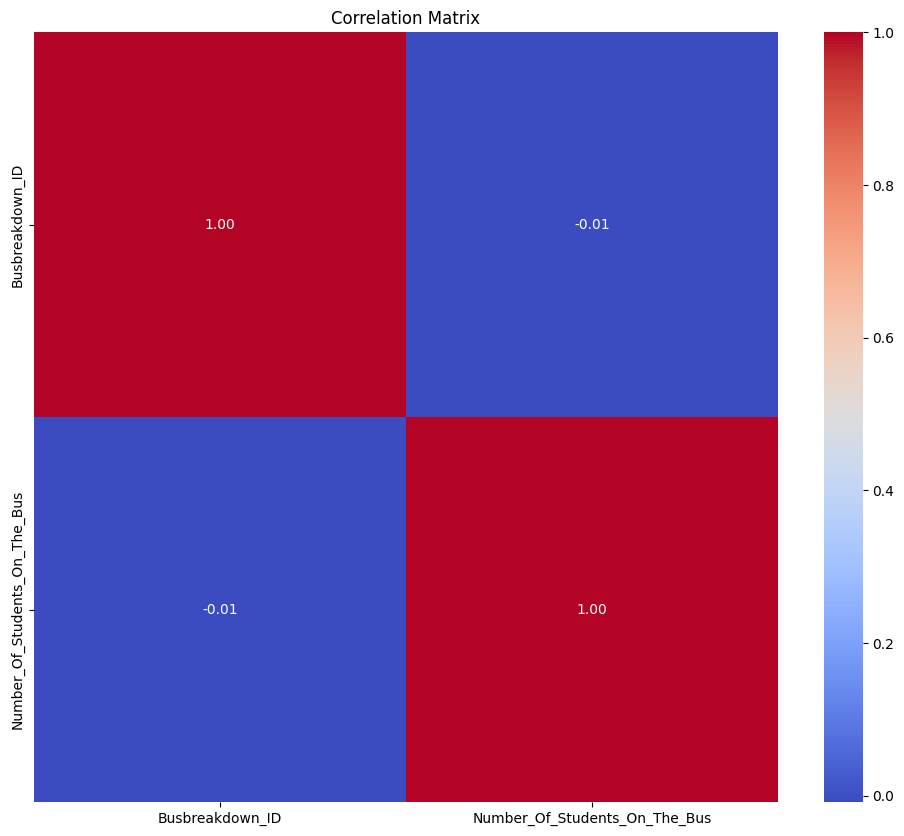

In [22]:
corr = df.select_dtypes(include=['float','int']).corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

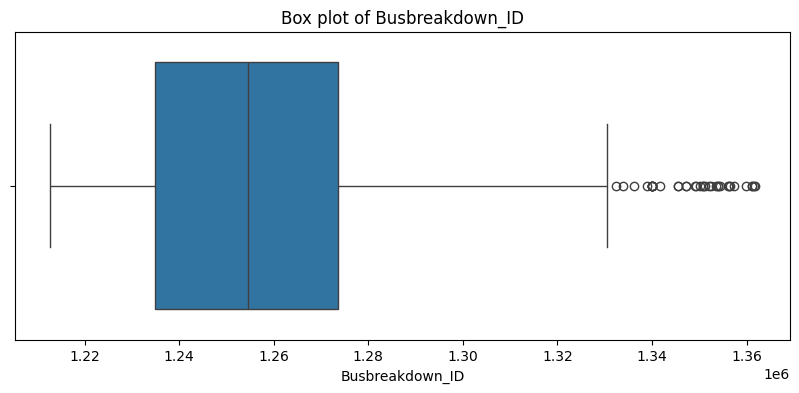

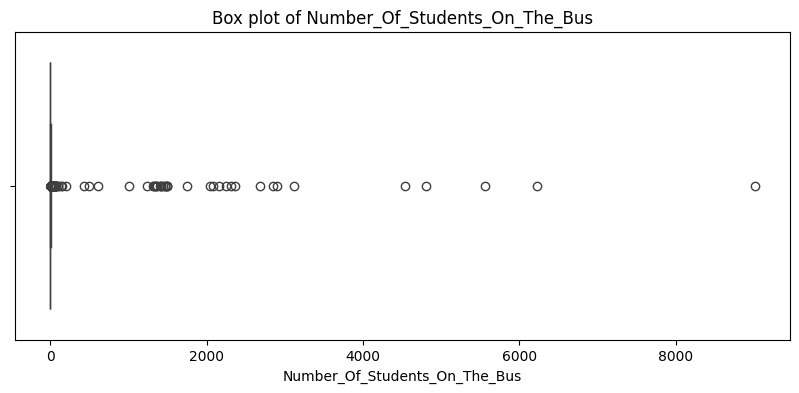

In [23]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')
    plt.show()

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [4]:
df['Run_Type'].fillna(df['Run_Type'].mode()[0], inplace=True)
df['Reason'].fillna(df['Reason'].mode()[0], inplace=True)
df['Route_Number'].fillna(df['Route_Number'].mode()[0], inplace=True)
df['Boro'].fillna(df['Boro'].mode()[0], inplace=True)
df['How_Long_Delayed'].fillna(df['How_Long_Delayed'].mode()[0], inplace=True)
df['Incident_Number'].fillna(df['Incident_Number'].mode()[0], inplace=True)
df['School_Age_or_PreK'].fillna(df['School_Age_or_PreK'].mode()[0], inplace=True)
df['Breakdown_or_Running_Late'].fillna(df['Breakdown_or_Running_Late'].mode()[0], inplace=True)

In [5]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,0
Bus_No,0
Route_Number,0
Reason,0
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,0


In [7]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in df.select_dtypes(include=['object']):
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [8]:
df

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,0,1224901,3,7481,77,6,5003,56392,61017,1,...,191,5,1,1,0,61017,4664,116763,1,0
1,0,1225098,3,8114,77,3,5071,56698,61329,1,...,837,3,1,1,0,61329,4664,117361,1,0
2,0,1215800,3,4662,209,3,4969,48207,51829,1,...,335,12,1,1,1,51829,4664,98486,1,0
3,0,1215511,3,4547,209,6,4968,48064,51656,1,...,110,11,1,1,1,51656,4664,98208,1,0
4,0,1215828,3,4554,209,6,5149,48210,51836,1,...,191,12,1,1,0,51836,4664,98548,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147967,1,1338452,3,8138,209,3,5041,21443,23188,1,...,389,7,1,1,0,23188,4664,47628,1,0
147968,1,1341521,3,15,479,3,5056,25138,27087,1,...,618,0,1,1,0,27087,4664,54720,1,0
147969,1,1353044,9,8642,10880,3,1350,33560,36071,1,...,692,0,1,1,1,36071,4380,71979,1,1
147970,1,1353045,9,6145,7663,9,3640,33561,36072,7,...,618,0,1,1,0,36072,4664,71978,0,1


In [24]:
df_encoded.duplicated().sum()

0

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = scaler.fit_transform(df[[column]])

In [11]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X = df_encoded.drop('Breakdown_or_Running_Late', axis=1)  # Use the DataFrame here
y = df_encoded['Breakdown_or_Running_Late']
X_resampled, y_resampled = smote.fit_resample(X, y)

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [14]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Training the Model
Train the ANN model using the training data.

In [15]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    verbose=1)

Epoch 1/20
3700/3700 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8728 - loss: 437.6078 - val_accuracy: 0.8871 - val_loss: 0.3535
Epoch 2/20
3700/3700 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.8847 - loss: 0.3576 - val_accuracy: 0.8871 - val_loss: 0.3527
Epoch 3/20
3700/3700 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8827 - loss: 0.3616 - val_accuracy: 0.8871 - val_loss: 0.3526
Epoch 4/20
3700/3700 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8820 - loss: 0.3629 - val_accuracy: 0.8871 - val_loss: 0.3526
Epoch 5/20
3700/3700 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8849 - loss: 0.3570 - val_accuracy: 0.8871 - val_loss: 0.3526
Epoch 6/20
3700/3700 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8845 - loss: 0.3579 - val_accuracy: 0.8871 - val_loss: 0.3527
Epoch 7/20
3700/3700 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8825 - loss: 0.3619 - val_accuracy: 0.8871 - val_loss: 0.3526
Epoch 8/20
3700/3700 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8815 - loss: 0.3

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [16]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8859 - loss: 0.3549
Test Loss: 0.3525852859020233
Test Accuracy: 0.8870755434036255


## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [17]:
predictions = model.predict(X)
predicted_classes = (predictions > 0.5).astype(int)
print("Predictions (probabilities):", predictions)
print("Predicted classes:", predicted_classes)

4625/4625 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
Predictions (probabilities): [[0.8871046]
 [0.8871046]
 [0.8871046]
 ...
 [0.8871046]
 [0.8871046]
 [0.8871046]]
Predicted classes: [[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

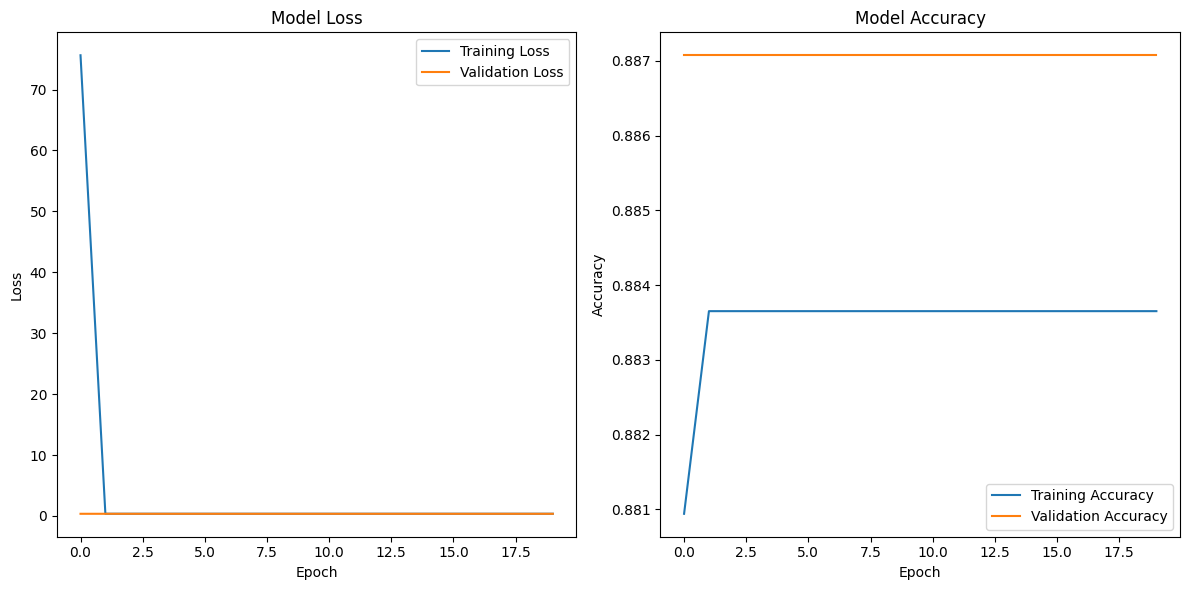

In [18]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))

# Training Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [26]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.3 MB/s eta 0:00:00


In [27]:
import kerastuner as kt

def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units1', min_value=32, max_value=128, step=32), activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(units=hp.Int('units2', min_value=32, max_value=128, step=32), activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(units=1, activation='sigmoid'))

    model.compile(optimizer=hp.Choice('optimizer', ['adam', 'rmsprop']), loss='binary_crossentropy', metrics=['accuracy'])
    return model

tuner = kt.Hyperband(build_model, objective='val_accuracy', max_epochs=10, hyperband_iterations=2)
tuner.search(X_train, y_train, epochs=10, validation_split=0.2)

Trial 56 Complete [00h 00m 49s]
val_accuracy: 0.8860449194908142

Best val_accuracy So Far: 0.8860449194908142
Total elapsed time: 00h 30m 26s

Search: Running Trial #57

Value             |Best Value So Far |Hyperparameter
96                |32                |units1
32                |128               |units2
0.3               |0.2               |dropout
rmsprop           |rmsprop           |optimizer
10                |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
0                 |2                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2960/2960 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8680 - loss: 1101.0607 - val_accuracy: 0.8860 - val_loss: 0.3555
Epoch 2/10
2960/2960 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8834 - loss: 0.3602 - val_accuracy: 0.8860 - val_loss: 0.3547
Epoch 3/10
2960/2960 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8816 - loss: 0.3637 - val_accuracy: 0.8860 - val_loss: 0.3547
Epoch 4/10
2960/2960 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8812 - loss: 0.3645 - val_accuracy: 0.8860 - val_loss: 0.3547
Epoch 5/10
2960/2960 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8819 - loss: 0.3632 - val_accuracy: 0.8860 - val_loss: 0.3547
Epoch 6/10
2960/2960 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8824 - loss: 0.3622 - val_accuracy: 0.8860 - val_loss: 0.3547
Epoch 7/10
2929/2960 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8830 - loss: 0.3609

KeyboardInterrupt: 

## Save the Model
Save the trained model for submission.

In [ ]:
model.save('ANN_model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:
After I loaded the dataset I tried to clean it ( handle missed values and Encode Categorical Variables ,Handle Imbalanced Data by smote)
Then I splited dataset to train and test data
And build ANN model I chosed this model beacouse ANNs can model complex, non-linear relationships between inputs and outputs. This is due to their architecture, which involves multiple layers and activation functions that introduce non-linearity

model architecture:
Input Layer: The first Dense layer accepts input data with X_train.shape[1] features and has 64 neurons with ReLU activation.

Hidden Layers: Two additional Dense layers with 128 and 64 neurons, respectively, both using ReLU activation to learn complex features.

Dropout Layer: A Dropout layer with a 50% dropout rate to reduce overfitting by randomly deactivating half of the neurons during training.

Output Layer: A Dense layer with a single neuron and sigmoid activation for binary classification.
 I used binary_crossentropy beacouse I deal with binary classification.

From the plot I observed the model encountered overfitting So I tried to do fine tuning
Fine-tuning helps the model generalize better to new, unseen data, reducing overfitting
I utilized hyperparameter tuning techniques for systematic optimization but it takes a lot of times.
I think I should experiment with the number of layers, neurons, and activation functions to find the best architecture.